# 从自动站数据中抽取数据


In [2]:
import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta

today =date.today()
sevenDayAgo = today - datetime.timedelta(days = 7)
print(type(sevenDayAgo))
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码
print(today)
conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

cursor = conn.cursor() # 获取光标
cursor.execute('USE ZJSZDZDB' )
# 天台、仙居、三门、临海、黄岩、洪家、路桥、温岭、玉环
sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='58559' or IIiii = '58652' or IIiii ='58568' or IIiii ='58660' or IIiii = '58655' or IIiii = '58665' or IIiii ='K8301' or IIiii ='58664' or IIiii ='K8505') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"

cursor.execute(sql) 

row = cursor.fetchall()
#print(row)
# 数据整理部分
print(pd.DataFrame(list(row)).shape)
data  = pd.DataFrame(list(row))
data_3h = data.iloc[0:10:3][2]
print(data.iloc[0:10:3][2])
data.to_csv('Result.csv')
cursor.close()  # 关闭游标
conn.close()  # 关闭连接

<class 'datetime.date'>
2020-09-27
(1014, 3)
0    13
3    10
6    19
9    23
Name: 2, dtype: int64


In [3]:
import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta

today =date.today()
sevenDayAgo = today - datetime.timedelta(days = 7)
print(sevenDayAgo)
print(type(sevenDayAgo))
# server = "172.21.158.201"    # 连接服务器地址
# user = "down"# 连接帐号
# password = "downx"# 连接密码

# conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

# cursor = conn.cursor() # 获取光标
# cursor.execute('USE ZJSZDZDB' )
# 天台、仙居、三门、临海、黄岩、洪家、路桥、温岭、玉环
# sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='58559' or IIiii = '58652' or IIiii ='58568' or IIiii ='58660' or IIiii = '58655' or IIiii = '58665' or IIiii ='K8301' or IIiii ='58664' or IIiii ='K8505') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"

# cursor.execute(sql) 

# row = cursor.fetchall()
# #print(row)
# # 数据整理部分
# print(pd.DataFrame(list(row)).shape)
# data  = pd.DataFrame(list(row))
# data_3h = data.iloc[0:10:3][2]
# print(data.iloc[0:10:3][2])


# 天台
# sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='58559') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"
# cursor.execute(sql) 
# row = cursor.fetchall()
# data  = pd.DataFrame(list(row))
# data_3h = data.iloc[:168:3][2]
# print(data_3h.shape)
stations = ['58559','58652','58568','58660','58665','58664']
station = '58655'
def read_sql_station(station):
    print("this is a read station file")
    print(i)
    server = "172.21.158.201"    # 连接服务器地址
    user = "down"# 连接帐号
    password = "downx"# 连接密码
    conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接
    cursor = conn.cursor() # 获取光标
    cursor.execute('USE ZJSZDZDB' )
    sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='"+station+"') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"
    cursor.execute(sql) 
    row = cursor.fetchall()
    data  = pd.DataFrame(list(row))
    #print(data)
    data_3h = data.iloc[::3][2]
    file_station = '/home/liyuan3970/ML_pred_station_max_wind/test/'
    data_3h.to_csv(file_station+station+'.csv')
    cursor.close()  # 关闭游标
    conn.close()  # 关闭连接
# read_sql_station(station)
for i in stations:
    read_sql_station(i)

2020-09-20
<class 'datetime.date'>
this is a read station file
58559
this is a read station file
58652
this is a read station file
58568
this is a read station file
58660
this is a read station file
58665
this is a read station file
58664


In [10]:
!pwd

/home/liyuan3970/ML_pred_station_max_wind/test


<class 'datetime.date'>
(721, 3)


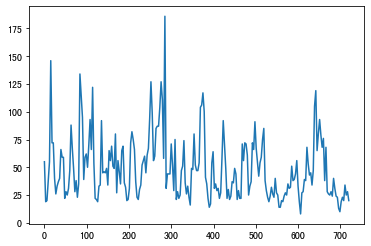

In [46]:
import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
today =date.today()
sevenDayAgo = today - datetime.timedelta(days = 30)
print(type(sevenDayAgo))
server = "172.21.158.201"    # 连接服务器地址
user = "down"# 连接帐号
password = "downx"# 连接密码

conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接

cursor = conn.cursor() # 获取光标
cursor.execute('USE ZJSZDZDB' )
# 天台
sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='58559') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"

cursor.execute(sql) 

row = cursor.fetchall()
#print(row)
# 数据整理部分
print(pd.DataFrame(list(row)).shape)
data  = pd.DataFrame(list(row))
data_3h = data.iloc[::3][2]
#print(data_3h)
#print(data_3h.iloc[0:10:3][2])
data_3h.plot()

cursor.close()  # 关闭游标
conn.close()  # 关闭连接

# 获取7天的ec数据

In [1]:
import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta
import matplotlib.pyplot as plt
import xarray as xr
from nmc_met_io.read_micaps import  read_micaps_4


#计算一个ec文件数据的列表
def file_name():
    print("this is  a file demo")
    file_path = "/home/liyuan3970/ML_pred_station_max_wind/test/max/"
    today =date.today()
    file = []
    num = 7
    for i in range(num):
        day = today - datetime.timedelta(days = i+1)
        time = str(day)[2:4]+str(day)[5:7]+str(day)[8:10]+"_fy"+".nc"
        file_combine = file_path + time
        file.append(file_combine)
        file.sort()
    return file

file = file_name()

#print(file)
#读取文件中的数据
file_zj_max=[]
for fi in file: 
    d_zj_max=xr.open_dataset(fi)
    file_zj_max.append(d_zj_max)
#print(file_zj_max)
data_7days =xr.concat(file_zj_max,dim='time')
print(data_7days)

/home/liyuan3970/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  """Entry point for launching an IPython kernel.
In /home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/liyuan3970/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


this is  a file demo
<xarray.Dataset>
Dimensions:                  (lat: 48, lon: 56, time: 56)
Coordinates:
  * lat                      (lat) float64 26.0 26.12 26.25 ... 31.75 31.88
  * lon                      (lon) float64 117.0 117.1 117.2 ... 123.8 123.9
  * time                     (time) datetime64[ns] 2020-09-21T23:00:00 ... 2020-09-28T20:00:00
    forecast_period          (time) float64 27.0 30.0 33.0 ... 42.0 45.0 48.0
    forecast_reference_time  (time) datetime64[ns] 2020-09-20T20:00:00 ... 2020-09-26T20:00:00
Data variables:
    data                     (time, lat, lon) float64 3.45 5.3 4.68 ... 8.6 8.73


In [20]:
! pwd

/home/liyuan3970/ML_pred_station_max_wind/test


# 线性关系

In [14]:
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

x = [1,2,3,4,5,6,7,8,9,10]
y = [2,3,4,5,6,7,8,9,10,11]
x1=np.array(x)
y1=np.array(y)
# 把x改为n行1列  这样才可以作为输入交给模型训练
x1 = x1.reshape(-1, 1)
print(x1)
# 训练模型
x2 = [[8]]
model = lm.LinearRegression()
model.fit(x1, y1)
pred_y = model.predict(x2)
print(pred_y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[9.]


# 正式工作

In [19]:
import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta
import matplotlib.pyplot as plt
import xarray as xr
from nmc_met_io.read_micaps import  read_micaps_4
import numpy as np

## 准备x的数据

#计算一个ec文件数据的列表
def file_name():
    print("this is  a file demo")
    file_path = "/home/liyuan3970/ML_pred_station_max_wind/test/max/"
    today =date.today()
    file = []
    num = 8
    for i in range(num):
        day = today - datetime.timedelta(days = i+1)
        time = str(day)[2:4]+str(day)[5:7]+str(day)[8:10]+"_fy"+".nc"
        file_combine = file_path + time
        file.append(file_combine)
        file.sort()
    return file

file = file_name()

#print(file)
#读取文件中的数据
file_zj_max=[]
for fi in file: 
    d_zj_max=xr.open_dataset(fi)
    file_zj_max.append(d_zj_max)
#print(file_zj_max)
x =xr.concat(file_zj_max,dim='time')

# 计算天台的相关系数29 120.5

lon = x.lon.data
lat = x.lat.data
lat_start = list(np.where(lat ==29))[0][0]
lon_start = list(np.where(lon ==120.5))[0][0]

print(x)
x_1 = x.data[:,lat_start,lon_start]
print(x.data[:,lat_start,lon_start].shape)#time lat lon 



import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta

today =date.today()
sevenDayAgo = today - datetime.timedelta(days = 7)
print(sevenDayAgo)
print(type(sevenDayAgo))

stations = ['58559','58652','58568','58660','58665','58664']
station = '58655'
def read_sql_station(station):
    print("this is a read station file")
    print(i)
    server = "172.21.158.201"    # 连接服务器地址
    user = "down"# 连接帐号
    password = "downx"# 连接密码
    conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接
    cursor = conn.cursor() # 获取光标
    cursor.execute('USE ZJSZDZDB' )
    sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='"+station+"') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"
    cursor.execute(sql) 
    row = cursor.fetchall()
    data  = pd.DataFrame(list(row))
    #print(data)
    data_3h = data.iloc[::3][2]
    file_station = '/home/liyuan3970/ML_pred_station_max_wind/test/'
    data_3h.to_csv(file_station+station+'.csv')
    cursor.close()  # 关闭游标
    conn.close()  # 关闭连接
# read_sql_station(station)
for i in stations:
    read_sql_station(i)

# y数据   
excel_file = '58665.csv'
import pandas as pd
df =  pd.read_csv(excel_file,usecols=[1])
print(df.shape)
y = df.iloc[0:55]

#print(x)
y1=y['2'].values.tolist()
x1 =x_1.data[0:55]
print(x1.shape)
x1 = x1.reshape(-1, 1)
print(type(x1))
x2 = x_1.data[56:]
x2 = x2.reshape(-1, 1)
import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

model = lm.LinearRegression()
model.fit(x1, y1)

pred_y = model.predict(x2)
# y2 = []
# for i  in pred_y:
#     int(i)
#     y2.append(i)
# #round(pred_y,2) 
y2 = np.trunc(pred_y)
print(pred_y,y2)
print(type(pred_y))

np.savetxt("new.csv", y2, delimiter=',')

this is  a file demo
<xarray.Dataset>
Dimensions:                  (lat: 48, lon: 56, time: 59)
Coordinates:
  * lon                      (lon) float64 117.0 117.1 117.2 ... 123.8 123.9
  * lat                      (lat) float64 26.0 26.12 26.25 ... 31.75 31.88
  * time                     (time) datetime64[ns] 2020-09-22T23:00:00 ... 2020-09-30T20:00:00
    forecast_period          (time) float64 27.0 30.0 33.0 ... 42.0 45.0 48.0
    forecast_reference_time  (time) datetime64[ns] 2020-09-21T20:00:00 ... 2020-09-28T20:00:00
Data variables:
    data                     (time, lat, lon) float64 5.23 3.95 ... 10.92 11.22
(59,)
2020-09-22
<class 'datetime.date'>
this is a read station file
58559
this is a read station file
58652
this is a read station file
58568
this is a read station file
58660
this is a read station file
58665
this is a read station file
58664
(57, 1)
(55,)
<class 'numpy.ndarray'>
[51.27314991 50.13393106 43.97284953] [51. 50. 43.]
<class 'numpy.ndarray'>


# 工厂模式的程序

In [19]:
# 导入库
import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta
import matplotlib.pyplot as plt
import xarray as xr
from nmc_met_io.read_micaps import  read_micaps_4
import numpy as np

import pymssql 
import pandas as pd
import time
import datetime
from datetime import  date, timedelta

import numpy as np
import sklearn.linear_model as lm
%matplotlib inline
import matplotlib.pyplot as mp
import sklearn.metrics as sm

import pandas as pd
station = '58660'
lon = 121.25
lat = 28.37

def woker(lat_station,lon_station,station):
    lat_station = lat_station
    lon_station = lon_station
    station = station
    print("this is  a file demo")
    file_path_ec = "/home/liyuan3970/ML_pred_station_max_wind/test/max/"
    today =date.today()
    file = []
    num = 8
    for i in range(num):
        day = today - datetime.timedelta(days = i+1)
        time = str(day)[2:4]+str(day)[5:7]+str(day)[8:10]+"_fy"+".nc"
        file_combine = file_path_ec + time
        file.append(file_combine)
        file.sort()
    #设置    
    file_zj_max=[]
    for fi in file: 
        d_zj_max=xr.open_dataset(fi)
        file_zj_max.append(d_zj_max)
    #print(file_zj_max)
    x =xr.concat(file_zj_max,dim='time')
    
    # 计算天台的相关系数29 120.5
    
    lon = x.lon.data
    lat = x.lat.data
    lat_start = list(np.where(lat ==28.5))[0][0]
    lon_start = list(np.where(lon ==121.25))[0][0]
    
    print(x)
    x_1 = x.data[:,lat_start,lon_start]
    print(x.data[:,lat_start,lon_start].shape)#time lat lon         
    sevenDayAgo = today - datetime.timedelta(days = 7)
    
    print("this is a read station file")
    print(i)
    server = "172.21.158.201"    # 连接服务器地址
    user = "down"# 连接帐号
    password = "downx"# 连接密码
    conn = pymssql.connect(server, user, password, "ZJSZDZDB")  #获取连接
    cursor = conn.cursor() # 获取光标
    cursor.execute('USE ZJSZDZDB' )
    sql  = "select IIiii ,tTime,fFy FROM TAB_Aws2020 WHERE (IIiii ='"+station+"') AND (tTime BETWEEN "+"'"+str(sevenDayAgo)+"'"+ "AND"+"'"+str(today) +"'"+ ") order BY IIiii,tTime"
    cursor.execute(sql) 
    row = cursor.fetchall()
    data  = pd.DataFrame(list(row))
    print(data)
    data_3h = data.iloc[::3][2]
    file_station = '/home/liyuan3970/ML_pred_station_max_wind/test/'
    data_3h.to_csv(file_station+station+'.csv')
    cursor.close()  # 关闭游标
    conn.close()  # 关闭连接 
    print(data_3h.shape)
    
    y = data_3h.iloc[0:55]
    print('y:',y)
    #print(x)
    #y1=y['2'].values.tolist()
    y1=y.tolist()
    x1 =x_1.data[0:55]
    print(x1.shape)
    x1 = x1.reshape(-1, 1)
    print(type(x1))
    x2 = x_1.data[56:]
    x2 = x2.reshape(-1, 1)
    model = lm.LinearRegression()
    model.fit(x1, y1)
    pred_y = model.predict(x2)
    # y2 = []
    # for i  in pred_y:
    #     int(i)
    #     y2.append(i)
    # #round(pred_y,2) 
    y2 = np.trunc(pred_y)
    print(pred_y,y2)
    print(type(pred_y))
    np.savetxt("new.csv", y2, delimiter=',')
    
    
woker(lat,lon,station)
    

this is  a file demo
<xarray.Dataset>
Dimensions:                  (lat: 48, lon: 56, time: 64)
Coordinates:
  * lat                      (lat) float64 26.0 26.12 26.25 ... 31.75 31.88
  * lon                      (lon) float64 117.0 117.1 117.2 ... 123.8 123.9
  * time                     (time) datetime64[ns] 2020-10-06T23:00:00 ... 2020-10-14T20:00:00
    forecast_period          (time) float64 27.0 30.0 33.0 ... 42.0 45.0 48.0
    forecast_reference_time  (time) datetime64[ns] 2020-10-05T20:00:00 ... 2020-10-12T20:00:00
Data variables:
    data                     (time, lat, lon) float64 4.15 4.79 ... 14.23 14.21
(64,)
this is a read station file
7
         0                   1   2
0    58660 2020-10-06 00:00:00  23
1    58660 2020-10-06 01:00:00  28
2    58660 2020-10-06 02:00:00  36
3    58660 2020-10-06 03:00:00  31
4    58660 2020-10-06 04:00:00  36
..     ...                 ...  ..
164  58660 2020-10-12 20:00:00  44
165  58660 2020-10-12 21:00:00  49
166  58660 2020-10-12 2